In [ ]:
# Load dataset iris dari sklearn

from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
print(iris.data)

In [ ]:
import pandas as pd

# Load dataset iris dari csv file
df = pd.read_csv('iris.csv')
print(df)

In [ ]:
# Pembelajaran DTL pada dataset iris

clfdtliris = tree.DecisionTreeClassifier()
clfdtliris = clfdtliris.fit(iris.data, iris.target)

In [ ]:
# Pembelajaran ANN pada dataset iris

from sklearn.neural_network import MLPClassifier
clfanniris = MLPClassifier(activation='logistic',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, 2), random_state=1)
clfanniris.fit(iris.data, iris.target)

In [ ]:
# Fungsi untuk print Confusion Matrix

print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
# Pembelajaran DTL dan ANN pada dataset iris dengan skema split train 90 % test 10 %

from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
class_names = iris.target_names

# Membagi menjadi 90 % train dan 10 % test
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=0)

# Pembelajaran DTL
classifierdtl = tree.DecisionTreeClassifier()
y_pred = classifierdtl.fit(X_train, y_train).predict(X_test)


# Pembelajaran ANN pada dataset iris

from sklearn.neural_network import MLPClassifier
classifierann = MLPClassifier(activation='logistic',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15, 2), random_state=1)
y_pred2 = classifierann.fit(X_train, y_train).predict(X_test)

In [ ]:
# Confusion Matrix untuk Klasifikasi DTL
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot untuk non-normalized Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix, Tanpa normalisasi')

# Plot untuk normalized Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion Matrix dengan Normalisasi')

plt.show()

In [ ]:
# Confusion Matrix untuk Klasifikasi ANN
cnf_matrix = confusion_matrix(y_test, y_pred2)
np.set_printoptions(precision=2)

# Plot untuk non-normalized Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix, Tanpa normalisasi')

# Plot untuk normalized Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion Matrix dengan Normalisasi')

plt.show()

In [ ]:
# Kinerja klasifikasi DTL
print("Kinerja klasifikasi DTL : ",classifierdtl.score(X_test,y_test))

# Kinerja klasifikasi ANN
print("Kinerja klasifikasi ANN : ",classifierann.score(X_test,y_test))

In [ ]:
# Safe model ke file eksternal

from sklearn import svm,datasets,tree
from sklearn.externals import joblib
iris = datasets.load_iris()
clfdtliris = tree.DecisionTreeClassifier()
clfdtliris = clfdtliris.fit(iris.data, iris.target)

joblib.dump(clfdtliris, 'modelklasifikasi.pkl')

In [ ]:
# Load model dari file eksternal

clfload = joblib.load('modelklasifikasi.pkl') 

In [ ]:
# Instance baru dengan pemberian nilai setiap atribut

instancebaru = [[ 2.5,  1. ,  5.9,  2.3]]

In [ ]:
# Klasifikasi DTL untuk instance baru
print("Klasifikasi DTL untuk instance baru : ")
print clfdtliris.predict(instancebaru)
print

# Klasifikasi ANN untuk instance baru
print("Klasifikasi ANN untuk instance baru : ")
print clfanniris.predict(instancebaru)
print

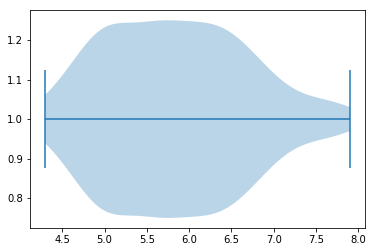

In [5]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Load in data
tips = pd.read_csv("iris.csv")

# Create violinplot
ax.violinplot(tips["sepal_length"], vert=False)

# Show the plot
plt.show()


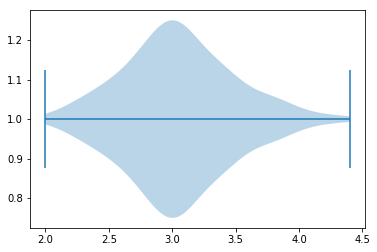

In [2]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Load in data
tips = pd.read_csv("iris.csv")

# Create violinplot
ax.violinplot(tips["sepal_width"], vert=False)

# Show the plot
plt.show()



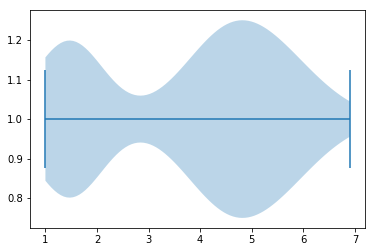

In [3]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Load in data
tips = pd.read_csv("iris.csv")

# Create violinplot
ax.violinplot(tips["petal_length"], vert=False)

# Show the plot
plt.show()



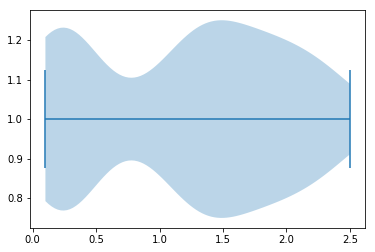

In [4]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Figure and Axes object
fig, ax = plt.subplots()

# Load in data
tips = pd.read_csv("iris.csv")

# Create violinplot
ax.violinplot(tips["petal_width"], vert=False)

# Show the plot
plt.show()


